# Import libraries

In [1]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import numpy as np

# Load and define Data

##### This dataset contains the results of a direct marketing campaign by a Portuguese bank. The goal was to predict whether a client would subscribe to a term deposit based on attributes like personal info, last contact, and economic indicators. 
##### Instances: 41,188
##### Features: 20 input variables + 1 target (y: yes/no)
##### 🔍 Feature Categories:
##### Client info: age, job, marital status, education, default, housing loan, personal loan
##### Last contact: contact type, month, day, duration
##### Campaign info: number of contacts, days since last contact, past campaign result
##### Economic context: employment variation, consumer price/confidence index, euribor rate, number of employees

In [4]:
df = pd.read_csv("data/bank-additional-full.csv" ,sep=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [10]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [11]:
import numpy as np

# تحويل كل "unknown" إلى NaN في كل الأعمدة
df.replace('unknown', np.nan, inplace=True)


In [12]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

# EDA 

### Who of all the customers is most likely to subscribe?

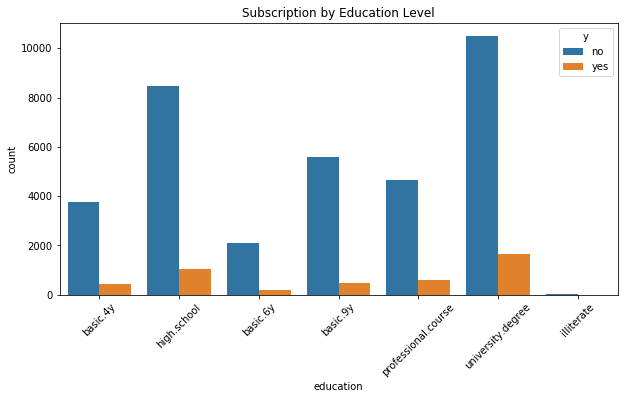

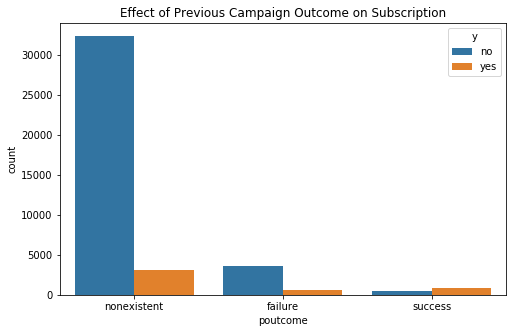

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='y')
plt.title('Subscription by Education Level')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='poutcome', hue='y')
plt.title('Effect of Previous Campaign Outcome on Subscription')
plt.show()


### Does call duration affect the likelihood of subscription?

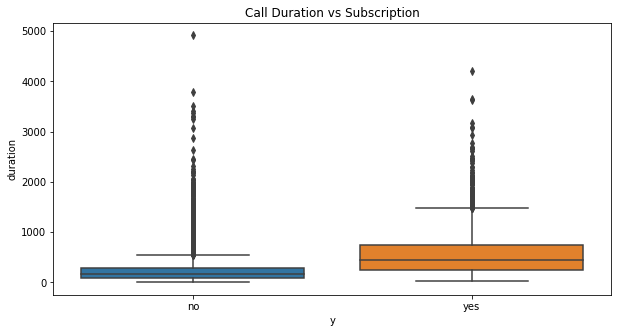

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='y', y='duration')
plt.title('Call Duration vs Subscription')
plt.show()


### What is the best month to run marketing campaigns?

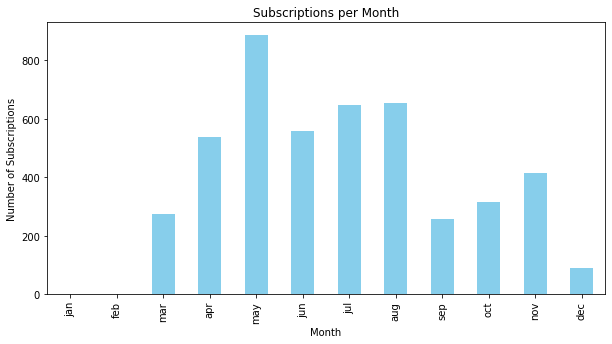

In [15]:
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_subs = df[df['y'] == 'yes']['month'].value_counts().reindex(months_order)

plt.figure(figsize=(10, 5))
month_subs.plot(kind='bar', color='skyblue')
plt.title('Subscriptions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.show()


### Do age and marital status have a combined effect?

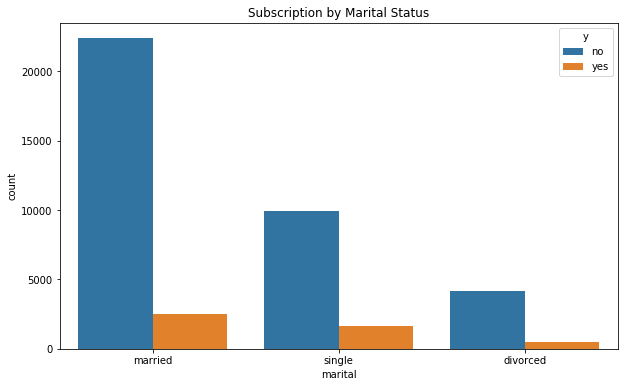

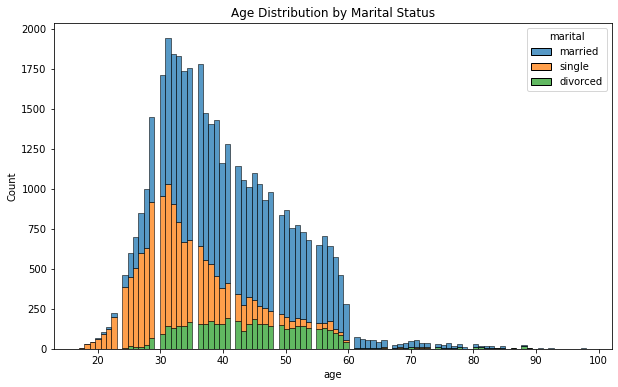

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital', hue='y')
plt.title('Subscription by Marital Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='marital', multiple='stack')
plt.title('Age Distribution by Marital Status')
plt.show()


### Does the type of contact affect?

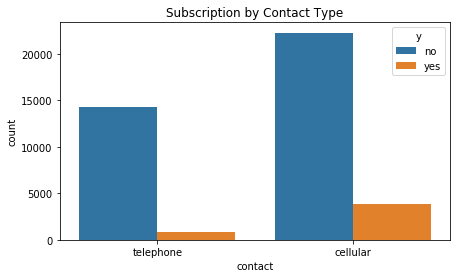

In [17]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='contact', hue='y')
plt.title('Subscription by Contact Type')
plt.show()


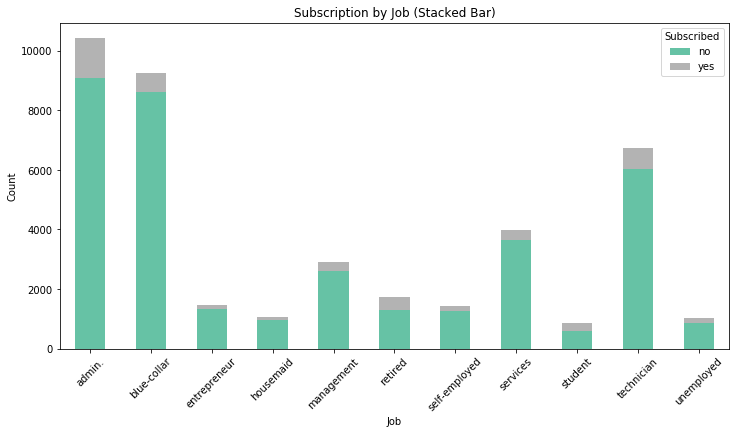

In [18]:
job_y = df.groupby(['job', 'y']).size().unstack()

job_y.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Subscription by Job (Stacked Bar)')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')
plt.show()


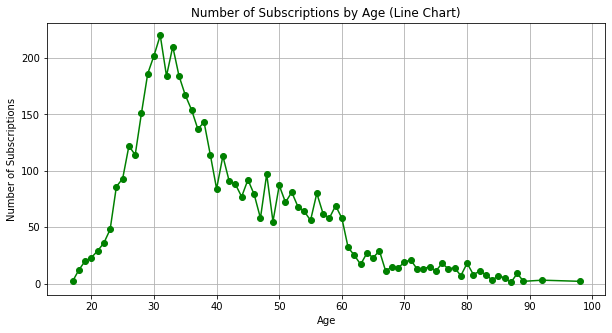

In [19]:
# Number of subscriptions by age (subscribers only)
age_sub = df[df['y'] == 'yes'].groupby('age').size()

plt.figure(figsize=(10, 5))
plt.plot(age_sub.index, age_sub.values, marker='o', color='green')
plt.title('Number of Subscriptions by Age (Line Chart)')
plt.xlabel('Age')
plt.ylabel('Number of Subscriptions')
plt.grid(True)
plt.show()


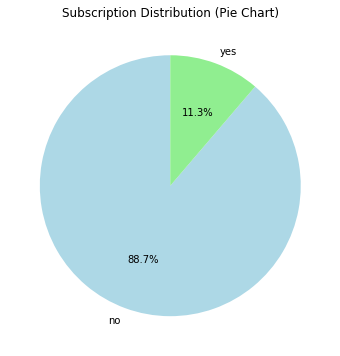

In [20]:
labels = df['y'].value_counts().index
sizes = df['y'].value_counts().values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Subscription Distribution (Pie Chart)')
plt.show()


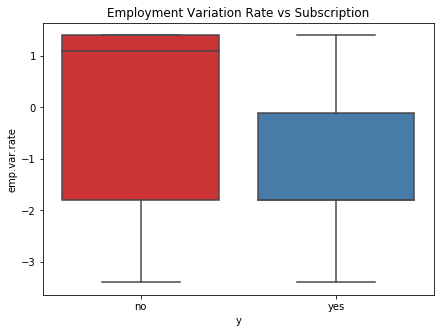

In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='y', y='emp.var.rate', palette='Set1')
plt.title('Employment Variation Rate vs Subscription')
plt.show()


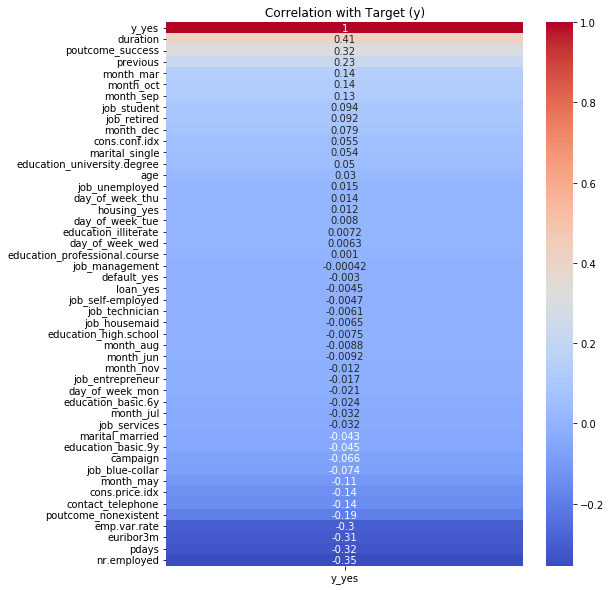

In [22]:
df_encoded = pd.get_dummies(df, drop_first=True)
corr = df_encoded.corr()['y_yes'].sort_values(ascending=False)

plt.figure(figsize=(8,10))
sns.heatmap(df_encoded.corr()[['y_yes']].sort_values(by='y_yes', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Target (y)')
plt.show()


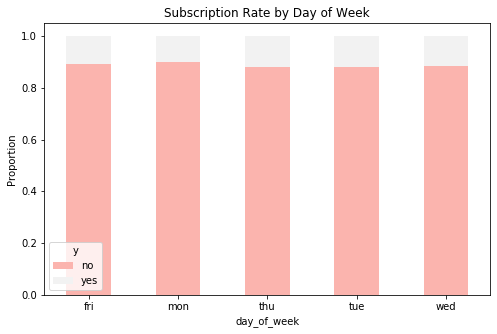

In [23]:
day_ratio = df.groupby('day_of_week')['y'].value_counts(normalize=True).unstack()
day_ratio.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Pastel1')
plt.title('Subscription Rate by Day of Week')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


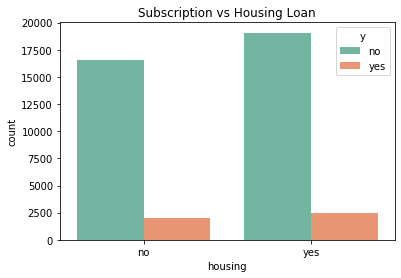

In [24]:
sns.countplot(data=df, x='housing', hue='y', palette='Set2')
plt.title('Subscription vs Housing Loan')
plt.show()


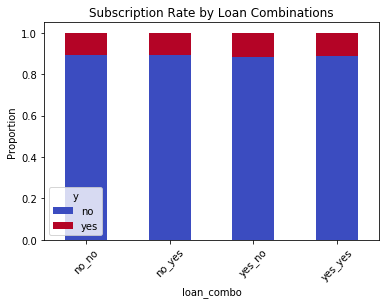

In [25]:
df['loan_combo'] = df['housing'] + '_' + df['loan']

combo_ratio = df.groupby('loan_combo')['y'].value_counts(normalize=True).unstack()
combo_ratio.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Subscription Rate by Loan Combinations')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


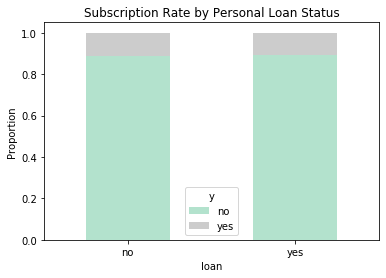

In [26]:
loan_ratio = df.groupby('loan')['y'].value_counts(normalize=True).unstack()
loan_ratio.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title('Subscription Rate by Personal Loan Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


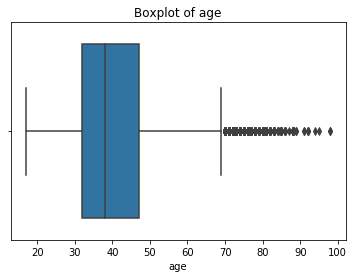

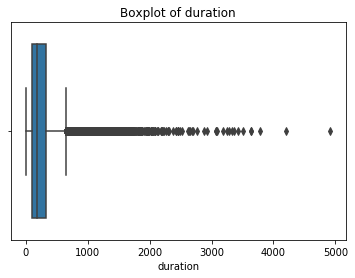

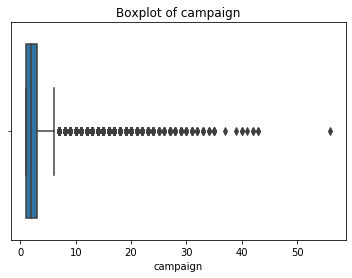

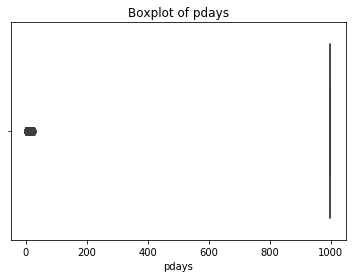

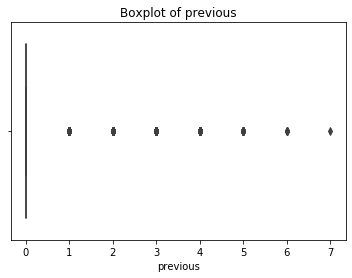

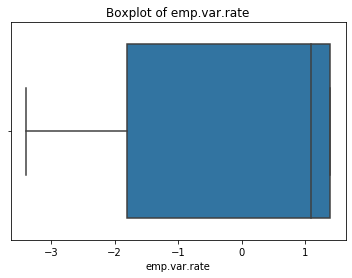

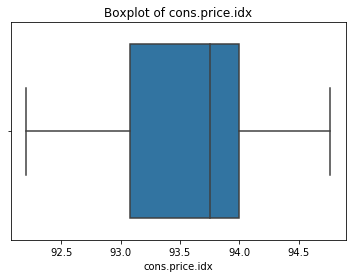

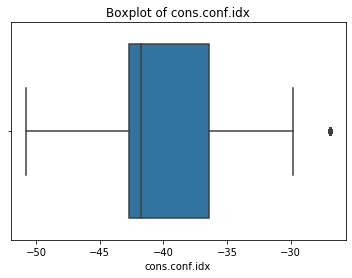

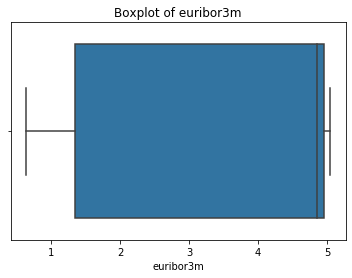

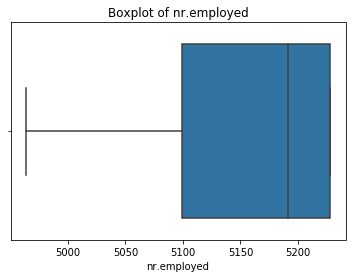

In [27]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [28]:
def winsorize_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Set values below the minimum to the minimum
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    # Set values above the maximum to the maximum.
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Apply it to columns that contain outliers.
for col in df.select_dtypes(include='number').columns:
    df = winsorize_iqr(df, col)


# Feature Engineering 

In [29]:
df['recent_contact'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)


In [30]:
df['has_loan'] = ((df['loan'] == 'yes') | (df['housing'] == 'yes')).astype(int)


In [31]:
df['duration_ratio'] = df['duration'] / df['duration'].mean()


In [32]:
df['duration'].mean()

234.9973171797611

# preprocessing Data

In [33]:
X = df.drop(['y', 'duration', 'pdays'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
for col in X_train.columns:
    if X_train[col].dtype == "object":
        fill_value = X_train[col].mode()[0]
    else:
        fill_value = X_train[col].mean()
    
    X_train[col] = X_train[col].fillna(fill_value)
    X_test[col] = X_test[col].fillna(fill_value)

In [35]:
le_dict = {}
for col in X_train.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col]) 
    le_dict[col] = le

In [36]:
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)
y_test = le_y.transform(y_test)


In [37]:
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5]
}

 #  1- LogisticRegression


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=100))
])
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l2"],
    "classifier__solver": ["lbfgs", "liblinear"]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Train Accuracy: 0.9076783004552352
Test Accuracy: 0.9088370963826171
Confusion Matrix:
 [[7140  163]
 [ 588  347]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.68      0.37      0.48       935

    accuracy                           0.91      8238
   macro avg       0.80      0.67      0.72      8238
weighted avg       0.90      0.91      0.90      8238



# 2 - RandomForest 

In [39]:

from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))



Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Train Accuracy: 0.9345978755690441
Test Accuracy: 0.9098082058752124
Confusion Matrix:
 [[7150  153]
 [ 590  345]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.69      0.37      0.48       935

    accuracy                           0.91      8238
   macro avg       0.81      0.67      0.72      8238
weighted avg       0.90      0.91      0.90      8238



# 3 - GradientBoosting

In [50]:
# إنشاء نموذج Gradient Boosting
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", GradientBoostingClassifier(n_estimators=100, random_state=42))
])

param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Train Accuracy: 0.9339301972685887
Test Accuracy: 0.9145423646516144
Confusion Matrix:
 [[7048  255]
 [ 449  486]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.66      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



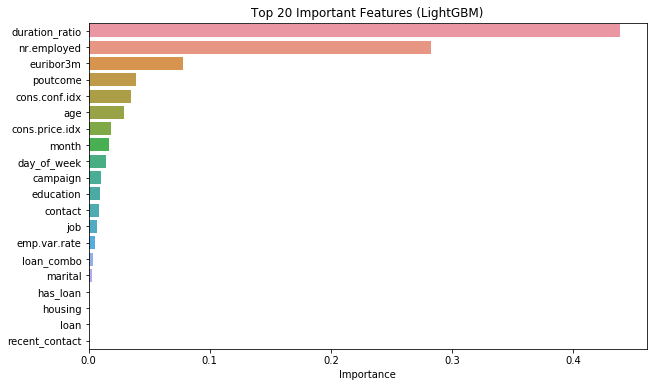

In [51]:
best_model = grid_search.best_estimator_.named_steps['classifier']
importances = best_model.feature_importances_
feature_names = X_train.columns 
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]
# رسم
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Top 20 Important Features (LightGBM)')
plt.xlabel('Importance')
plt.show()

In [53]:
x_train_edit = X_train.drop(columns=['recent_contact','housing','has_loan','default','loan','previous'])
x_test_edit = X_test.drop(columns=['recent_contact','housing','has_loan','default','loan','previous'])

In [54]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", GradientBoostingClassifier(n_estimators=100, random_state=42))
])

param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(x_train_edit, y_train)
y_train_pred = grid_search.predict(x_train_edit)
y_test_pred = grid_search.predict(x_test_edit)
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Train Accuracy: 0.9338088012139606
Test Accuracy: 0.915877640203933
Confusion Matrix:
 [[7053  250]
 [ 443  492]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.66      0.53      0.59       935

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



#### save this model because it has a highest accuarcy 

In [55]:
import joblib

best_model = grid_search.best_estimator_

# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [67]:
feature_names = x_train_edit.columns
feature_names

Index(['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'campaign', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'loan_combo',
       'duration_ratio'],
      dtype='object')

# 4 - ExtraTrees

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Train Accuracy: 0.9956904400606981
Test Accuracy: 0.9078659868900218
Confusion Matrix:
 [[7081  222]
 [ 537  398]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.64      0.43      0.51       935

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



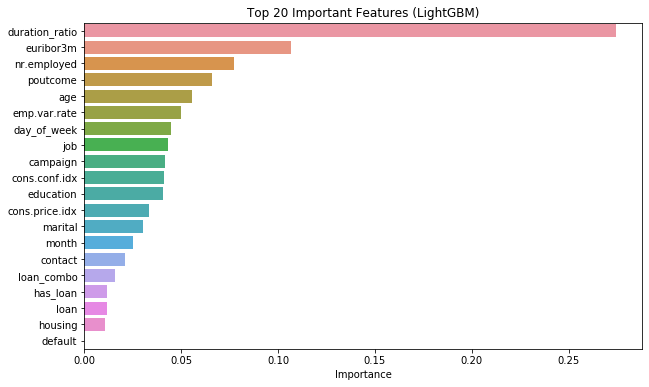

In [49]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", ExtraTreesClassifier(n_estimators=100, random_state=42))
])

param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

best_model = grid_search.best_estimator_.named_steps['classifier']
importances = best_model.feature_importances_
feature_names = X_train.columns 
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]

# رسم
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Top 20 Important Features (LightGBM)')
plt.xlabel('Importance')
plt.show()



# 5- LGB model

In [44]:
from lightgbm import LGBMClassifier

pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier",LGBMClassifier(random_state=42) )
])
param_grid = {
    "classifier__n_estimators": [100],
    "classifier__max_depth": [5],
    "classifier__learning_rate": [0.1]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


[LightGBM] [Info] Number of positive: 2964, number of negative: 23396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112443 -> initscore=-2.066025
[LightGBM] [Info] Start training from score -2.066025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2964, number of negative: 23396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 26360, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112443 -> initscore=-2.066025
[LightGBM] [Info] Start training from score -2.066025
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3705, number of negative: 29245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112443 -> initscore=-2.066025
[LightGBM] [Info] Start training from score -2.066025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

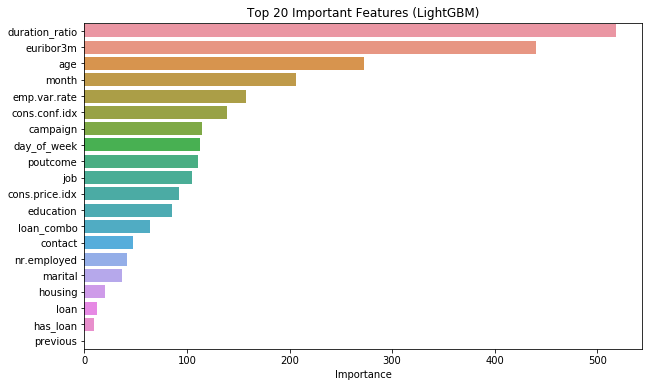

In [47]:
best_model = grid_search.best_estimator_.named_steps['classifier']
importances = best_model.feature_importances_
feature_names = X_train.columns 
# ترتيب حسب الأهمية
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]

# رسم
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Top 20 Important Features (LightGBM)')
plt.xlabel('Importance')
plt.show()


In [56]:
le_job = LabelEncoder()
le_job.fit(df['job'])
joblib.dump(le_job,'job_encode.pkl')

['job_encode.pkl']

In [57]:
le_campaign = LabelEncoder()
le_campaign.fit(df['campaign'])
joblib.dump(le_campaign,'campaign.pkl')

['campaign.pkl']

In [58]:
le_education = LabelEncoder()
le_education.fit(df['education'])
joblib.dump(le_education,'education.pkl')

['education.pkl']

In [59]:
le_month = LabelEncoder()
le_month.fit(df['month'])
joblib.dump(le_month,'month.pkl')

['month.pkl']

In [60]:
le_day_of_week = LabelEncoder()
le_day_of_week.fit(df['day_of_week'])
joblib.dump(le_day_of_week,'day_of_week.pkl')

['day_of_week.pkl']

In [61]:
le_contact = LabelEncoder()
le_contact.fit(df['contact'])
joblib.dump(le_contact,'contact.pkl')

['contact.pkl']

In [62]:
le_marital = LabelEncoder()
le_marital.fit(df['marital'])
joblib.dump(le_marital,'marital.pkl')

['marital.pkl']

In [63]:
le_poutcome = LabelEncoder()
le_poutcome.fit(df['poutcome'])
joblib.dump(le_poutcome,'poutcome.pkl')

['poutcome.pkl']

In [64]:
le_loan = LabelEncoder()
le_loan.fit(df['loan'])
joblib.dump(le_loan,'loan.pkl')

['loan.pkl']

In [65]:
le_housing = LabelEncoder()
le_housing.fit(df['housing'])
joblib.dump(le_housing,'housing.pkl')

['housing.pkl']